# Determining absolute hydration free energy offsets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span><ul class="toc-item"><li><span><a href="#Descriptors" data-toc-modified-id="Descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptors</a></span></li><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fingerprints</a></span></li><li><span><a href="#Compile-features" data-toc-modified-id="Compile-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compile features</a></span></li><li><span><a href="#Remove-columns-with-string-values" data-toc-modified-id="Remove-columns-with-string-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove columns with string values</a></span></li><li><span><a href="#Convert-all-values-to-float" data-toc-modified-id="Convert-all-values-to-float-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Convert all values to float</a></span></li><li><span><a href="#Normalise-data" data-toc-modified-id="Normalise-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Normalise data</a></span></li><li><span><a href="#Perform-PCA-on-features-alone" data-toc-modified-id="Perform-PCA-on-features-alone-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Perform PCA on features alone</a></span></li><li><span><a href="#Recover-top-PCs" data-toc-modified-id="Recover-top-PCs-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Recover top PCs</a></span></li></ul></li><li><span><a href="#Label-generation" data-toc-modified-id="Label-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label generation</a></span></li><li><span><a href="#Training-and-testing-set-generation" data-toc-modified-id="Training-and-testing-set-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training and testing set generation</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Training-set" data-toc-modified-id="Training-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li><li><span><a href="#Testing-set" data-toc-modified-id="Testing-set-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Perform-5-fold-cross-validation" data-toc-modified-id="Perform-5-fold-cross-validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Perform 5-fold cross-validation</a></span></li><li><span><a href="#Start-log-file" data-toc-modified-id="Start-log-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Start log file</a></span></li><li><span><a href="#Define-SVR" data-toc-modified-id="Define-SVR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define SVR</a></span></li><li><span><a href="#Train-SVR" data-toc-modified-id="Train-SVR-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train SVR</a></span></li><li><span><a href="#Write-SVR-statistic-outputs" data-toc-modified-id="Write-SVR-statistic-outputs-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Write SVR statistic outputs</a></span></li><li><span><a href="#Plot-convergence" data-toc-modified-id="Plot-convergence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plot convergence</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>External testing</a></span><ul class="toc-item"><li><span><a href="#Per-SVR-model" data-toc-modified-id="Per-SVR-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Per SVR model</a></span></li><li><span><a href="#Averaged-over-all-models" data-toc-modified-id="Averaged-over-all-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Averaged over all models</a></span></li></ul></li><li><span><a href="#Corrected-hydration-free-energies" data-toc-modified-id="Corrected-hydration-free-energies-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Corrected hydration free energies</a></span><ul class="toc-item"><li><span><a href="#Best-and-worst-corrected-ligands" data-toc-modified-id="Best-and-worst-corrected-ligands-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Best and worst corrected ligands</a></span></li></ul></li><li><span><a href="#Determining-high-absolute-errors" data-toc-modified-id="Determining-high-absolute-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Determining high absolute errors</a></span><ul class="toc-item"><li><span><a href="#Tanimoto-Coefficient" data-toc-modified-id="Tanimoto-Coefficient-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Tanimoto Coefficient</a></span></li><li><span><a href="#Absolute-error-<-1.00" data-toc-modified-id="Absolute-error-<-1.00-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Absolute error &lt; 1.00</a></span></li><li><span><a href="#1.00-<-absolute-error-<-2.00" data-toc-modified-id="1.00-<-absolute-error-<-2.00-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>1.00 &lt; absolute error &lt; 2.00</a></span></li><li><span><a href="#Absolute-error->-2.00" data-toc-modified-id="Absolute-error->-2.00-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Absolute error &gt; 2.00</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
import os
import csv
import subprocess
import time
import shutil
import glob
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import statistics
import pickle

# SciKit-Optimise:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.utils import use_named_args

# SVM:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles, rdMolDescriptors
from rdkit.Chem import SDMolSupplier, Descriptors, Crippen, Lipinski, Fragments
from rdkit import DataStructs

# Misc.:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from scipy import stats
import statistics
import pickle
from mordred import Calculator, descriptors

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
absolute_dGoffset_path = './absolute_dGoffset/'

# dataset_path = '~/Dropbox/FreeSolv/dGlearn-FreeSolv-master/datasets/train_compiled/dGhydr_train.csv'
offset_col_name = 'dGoffset (kcal/mol)'

# set data processing configurations:
PCA_threshold = 0.95  # Keeps n dimensions for x variance explained
replicates = 30  # Number of replicates per subject model
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
startpoint_BO = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance
ensemble_size = 10  # Amount of top-scoring models to retain per fold-dataset combination
# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

split = 'dG(hydr)'
translated_subject = 'absolute'

In [3]:
def plot_scatter(dataframe, x_info, y_info, title, MAE):
    """x and y info are lists with fomrat [datatframe_index, axis label]."""
    
    # x and y data
    x = dataframe.iloc[:, x_info[0]]
    y = dataframe.iloc[:, y_info[0]]
    
    # plot scatter
    plt.scatter(x, y, 
                color='black', 
                s=8)
    
    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
             color='black', 
             linewidth=1)
    
    # axis labels
    plt.xlabel(x_info[1])
    plt.ylabel(y_info[1])
    
    plt.title(title)
    
    # R-squared
    r2 = r2_score(x, y)
    
    # MAE
    # MAE = mean_squared_error(x, y)
    
    # annotate with r-squared and MAE
    string = 'R-squared = {}\nMAE = {}'.format(round(r2, 4), round(MAE, 4))
    plt.annotate(string, 
                 xy=(0, 1), 
                 xytext=(12, -12), 
                 va='top', 
                 xycoords='axes fraction', 
                 textcoords='offset points')

## Feature generation
### Descriptors
- Open user-specified descriptors and create list.
- Consult http://mordred-descriptor.github.io/documentation/master/descriptors.html.
- All descriptors have been used.

In [4]:
descriptors_raw = open(absolute_dGoffset_path + 'features_X/mordred_descriptors/all_descriptors.txt', 'r')
descriptors_raw_list = [line.split('\n') for line in descriptors_raw.readlines()]
descriptors_list = [desc[0] for desc in descriptors_raw_list]

print('Number of descriptors:', str(len(descriptors_list)))

Number of descriptors: 1825


- Load in all FreeSolve SDF files.
- Calculate all descriptors.

In [5]:
# set up feature calculator
print("Generating features...")
calc = Calculator(descriptors, ignore_3D=False)

# Supply SDF
SDF_dr = './datasets/sdffiles/'
suppl = [sdf for sdf in glob.glob(SDF_dr + '*.sdf')]

# Empty DataFrame containing only descriptor names as headings
mordred_df = pd.DataFrame(columns=descriptors_list)

ID_lst = []

for mol in suppl:
    ID = mol.strip(SDF_dr)
    ID_lst.append(ID)
    feat = calc.pandas(Chem.SDMolSupplier(mol))
    mordred_df = mordred_df.append(feat, ignore_index=True, sort=False)

Generating features...


100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


In [6]:
# Insert IDs as new column with column index = 0
mordred_df.insert(0, 'ID', ID_lst)
mordred_df

mordred_save_loc = absolute_dGoffset_path + 'features_X/mordred_descriptor_output/mordred_descriptors.csv'

if os.path.exists(mordred_save_loc):
    os.remove(mordred_save_loc)
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)
    print('Existing file overwritten.')
else:
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)

print('Completed writing all calculated mordred descriptors to CSV.')

Existing file overwritten.
Completed writing all calculated mordred descriptors to CSV.


### Fingerprints

In [7]:
FP_table = []

for sdf in glob.glob(SDF_dr + '*.sdf'):
    
    FP_row = []
    
    # Append ligand ID
    FP_row.append(sdf.strip(SDF_dr).strip('*.sdf'))
    
    # Setup fingerprint
    mol = Chem.rdmolfiles.SDMolSupplier(sdf)[0]
    mol.UpdatePropertyCache(strict=False)
    
    # Calculate fingerprint
    FP = rdMolDescriptors.GetHashedAtomPairFingerprint(mol, 256)
    for x in list(FP):
        FP_row.append(x)
    
    FP_table.append(FP_row)

# Column names
ID_col = ['ID']
FP_col = np.arange(0, 256).tolist()
FP_col = [ID_col.append("pfp" + str(item)) for item in FP_col]

FP_df = pd.DataFrame(FP_table, columns=ID_col)
FP_df

# Save to CSV
FP_save_loc = absolute_dGoffset_path + 'features_X/fingerprints_output/fingerprints.csv'

if os.path.exists(FP_save_loc):
    os.remove(FP_save_loc)
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)
    print('Existing file overwritten.')
else:
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)

print('Completed writing all calculated fingerprints to CSV.')

Existing file overwritten.
Completed writing all calculated fingerprints to CSV.


### Compile features

In [8]:
compiled_X_df = mordred_df
compiled_X_df = compiled_X_df.join(FP_df.set_index('ID'), on='ID')
# compiled_df = compiled_df.set_index('ID')
compiled_X_df

,ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
0,mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,...,0,0,0,0,0,0,0,0,0,0
1,mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,0,0,0,0,0,0,0,0,0,0
2,mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,...,0,0,0,0,0,0,0,0,0,1
3,mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,0,0,0,0,0,0,0,0,0,0
4,mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,...,2,0,0,0,0,0,0,0,6,4
638,mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,...,0,0,0,0,0,0,0,0,0,0
639,mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,...,0,0,4,4,0,2,0,1,0,0
640,mobley_3980099,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,...,0,0,0,0,0,0,0,0,3,2


In [9]:
# Save to 
if not os.path.isdir(absolute_dGoffset_path + 'features_X/tmp/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/tmp/')
tmp_compiled_X = absolute_dGoffset_path + 'features_X/tmp/compiled_data.csv'

if os.path.exists(tmp_compiled_X):
    os.remove(tmp_compiled_X)
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)
    print('Existing file overwritten.')
else:
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)

print('Completed writing temporary compiled features to CSV.')

Existing file overwritten.
Completed writing temporary compiled features to CSV.


### Remove columns with string values

In [10]:
def check_dataframe_is_numeric(dataframe):
    """Iterate over all columns and check if numeric.

    Returns:
    New DataFrame with removed"""

    columns_dropped = 0
    columns_dropped_lst = []

    for col in dataframe.columns:
        for index, x in zip(dataframe.index, dataframe.loc[:, col]):
            try:
                float(x)
            except ValueError:
                columns_dropped_lst.append([col, index, x])
                columns_dropped += 1
                dataframe = dataframe.drop(columns=col)
                break

    print('Number of columns dropped:', (columns_dropped))
    return dataframe, columns_dropped_lst


tmp_compiled_df = pd.read_csv(tmp_compiled_X, index_col='ID')
numeric_X, columns_dropped = check_dataframe_is_numeric(tmp_compiled_df)
numeric_X

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,126,127,128,129,130,131,132,133,134,225,226,227,333,334,335,336,337,338,339,340,341,441,442,443,522,523,538,539,618,619,634,635,664,665,679,692,705,718,731,744,757,770,833,859,867,868,875,883,884,932,1275,1276,1277,1278,1299,1300,1349,1765,1793,1794,1796,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of columns dropped: 712


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,2.707505,...,0,0,0,0,0,0,0,0,0,0
mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0,0,0,0,0,0,0,0,0,0
mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,0,0,0,0,0,0,0,0,0,1
mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0,0,0,0,0,0,0,0,0,0
mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,3.733857,...,2,0,0,0,0,0,0,0,6,4
mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,0,0,0,0,0,0,0,0,0,0
mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,3.384121,...,0,0,4,4,0,2,0,1,0,0


- Columns dropped with respective ID index at infringing non-numeric value. The non-numeric value is also shown.
- Note: only one non-numeric value per column is detailed.

In [11]:
dropped_col_df = pd.DataFrame(columns_dropped, columns=['column dropped', 'at ID', 'non-numeric value'])
dropped_col_df

,column dropped,at ID,non-numeric value
0,VR3_A,mobley_5631798,divide by zero encountered in log (VR3_A/VR3)
1,ATS0s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
2,ATS1s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
3,ATS2s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
4,ATS3s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
...,...,...,...
707,TopoShapeIndex,mobley_5631798,invalid value encountered in double_scalars (T...
708,PetitjeanIndex,mobley_5631798,invalid value encountered in double_scalars (P...
709,Vabc,mobley_664966,unknown atom type (Vabc)
710,VAdjMat,mobley_5631798,divide by zero encountered in log2 (VAdjMat)


In [12]:
# Save to CSV
dropped_col_save_loc = absolute_dGoffset_path + 'features_X/dropped_features.csv'

if os.path.exists(dropped_col_save_loc):
    os.remove(dropped_col_save_loc)
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)
    print('Existing file overwritten.')
else:
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)

print('Completed writing dropped columns to CSV.')

Existing file overwritten.
Completed writing dropped columns to CSV.


### Convert all values to float

In [13]:
float_X = numeric_X.apply(pd.to_numeric).astype(float).sample(frac=1)
float_X = float_X.rename(columns={'dGhydr (kcal/mol)': 'dGoffset (kcal/mol)'})
float_X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_430089,2.828427,3.146264,0.0,0.0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_5079234,4.949747,5.143137,0.0,0.0,9.517541,1.879385,3.758770,9.517541,1.189693,2.876615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_2099370,14.417934,12.400650,1.0,0.0,24.433289,2.360850,4.721699,24.433289,1.285963,3.853830,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,12.0,3.0
mobley_7814642,6.651690,6.355891,0.0,0.0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
mobley_6896128,5.059137,5.436502,0.0,0.0,9.409260,1.989044,3.978088,9.409260,1.176158,2.888520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8882696,3.535534,3.535534,0.0,0.0,6.472136,2.000000,3.618034,6.472136,1.294427,2.525424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_2068538,1.414214,1.414214,0.0,0.0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_2279874,4.242641,4.859933,0.0,0.0,8.000000,2.000000,4.000000,8.000000,1.142857,2.753451,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


### Normalise data

In [14]:
def normalise_and_split_datasets(dataframe):

    # Calculate statistics, compute Z-scores, clean:
    print('Normalising...')
    stats = dataframe.describe()
    stats = stats.transpose()

    def norm(x):
        return (x - stats['mean']) / stats['std']

    # Normalise and return separately:
    normed_data = norm(dataframe).fillna(0).replace([np.inf, -np.inf], 0.0)

    return normed_data


normalised_X = normalise_and_split_datasets(float_X)
normalised_X

Normalising...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_430089,-0.947422,-0.919838,-0.262213,-0.205174,-0.882224,-0.979267,-0.961317,-0.882224,-0.387428,-0.952787,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_5079234,-0.333855,-0.249644,-0.262213,-0.205174,-0.147331,-0.524368,-0.502699,-0.147331,0.274364,-0.053244,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_2099370,2.404706,2.186137,1.296498,-0.205174,2.556913,0.962165,0.995987,2.556913,0.932040,1.753830,...,-0.264229,7.240530,-0.210408,-0.19299,10.752782,-0.245923,-0.110516,-0.148061,4.294723,0.724275
mobley_7814642,0.158412,0.157383,-0.262213,-0.205174,0.083781,0.607029,0.637948,0.083781,0.338920,0.358820,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.080542,0.724275
mobley_6896128,-0.302215,-0.151184,-0.262213,-0.205174,-0.166962,-0.185795,-0.161358,-0.166962,0.181897,-0.031228,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8882696,-0.742899,-0.789191,-0.262213,-0.205174,-0.699466,-0.151967,-0.721739,-0.699466,0.989867,-0.702669,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_2068538,-1.356466,-1.501152,-0.262213,-0.205174,-1.360075,-1.960596,-1.950671,-1.360075,-1.412244,-1.952672,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_2279874,-0.538377,-0.344693,-0.262213,-0.205174,-0.422463,-0.151967,-0.127254,-0.422463,-0.045597,-0.280999,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,8.365868,-0.110516,-0.148061,-0.478293,-0.490842


### Perform PCA on features alone

In [15]:
def reduce_features(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection

    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)

    # Fit to and transform training set:
    train_post_pca = pd.DataFrame(pca.fit_transform(training_data))
    
    # Reset column names to PCX
    PCA_col = np.arange(1, len(train_post_pca.columns) + 1).tolist()
    PCA_col = ['PC' + str(item) for item in PCA_col]
    train_post_pca.columns = PCA_col
    train_post_pca.index = training_data.index

    print('Number of PCA features after reduction: ' + str(len(train_post_pca.columns)))

    # pickle pca object to file so that external test sets can be transformed accordingly
    # (see https://stackoverflow.com/questions/42494084/saving-large-data-set-pca-on-disk
    # -for-later-use-with-limited-disc-space)
    # pickle.dump(pca, open('./opt_output/pca_trainingset.p', 'wb'))
    
    return train_post_pca  # return list with test_post_pca when needed


reduced_X = reduce_features(normalised_X, PCA_threshold)
reduced_X

Computing PCA, reducing features up to 95.0% VE...
Number of PCA features after reduction: 111


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111
ID,,,,,,,,,,,,,,,,,,,,,
mobley_430089,-16.543160,-3.202585,-4.276046,0.833000,3.201151,-0.545300,0.190639,3.165959,0.353518,1.109769,...,-1.165215,-0.823247,-2.053842,-1.342935,1.550942,-0.210169,-1.037281,1.095432,-0.757740,1.306453
mobley_5079234,-2.197250,-12.435101,-0.978074,2.170971,2.679881,2.708685,3.546809,-3.511334,-5.829322,-4.631446,...,0.334822,0.916724,-0.759262,0.154186,0.012818,0.460210,0.242404,-0.618781,0.142109,0.581201
mobley_2099370,42.892933,-4.746339,-4.803837,-5.171578,-0.876541,-7.608588,2.348534,0.635957,0.796708,-6.537600,...,0.282376,-1.143999,1.276642,-1.710291,-1.754568,-2.018155,-0.342080,0.378211,0.466130,-1.290061
mobley_7814642,-0.234135,13.841871,-7.262046,-0.049861,1.783927,-1.929376,-3.550832,-3.712506,-0.651615,2.589533,...,-0.382219,0.084465,0.272178,-1.272789,-0.172311,0.189927,0.237885,-0.289283,0.459999,0.389950
mobley_6896128,-2.812773,-14.168877,-6.533941,4.443663,1.744329,5.627300,-0.561610,-4.711272,-0.284042,-0.526314,...,0.910300,0.031326,0.315453,-0.041773,-0.431440,0.199873,-0.262570,0.486708,-0.060915,0.384426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8882696,-15.183565,-2.199563,-0.102234,0.398326,-0.529964,3.230748,3.000057,4.881083,-2.121610,-0.715549,...,-0.527399,0.372495,-2.043294,0.296972,-0.197412,1.401167,0.783480,-0.739708,0.408603,-0.486220
mobley_2068538,-25.070087,-5.713134,-2.307109,6.475840,2.499863,-0.245638,5.017628,3.726762,5.435950,2.945599,...,-0.185776,-0.542197,0.322709,-0.582504,0.171429,-0.344101,-0.473202,0.249808,0.127797,-0.515890
mobley_2279874,-7.344463,-3.999737,11.998725,-0.379919,-9.958166,2.206310,6.956362,-0.357550,4.090568,5.446765,...,0.767819,0.774983,-0.772361,0.278256,-0.281895,0.410406,-0.702222,0.011292,-0.461612,-0.583576


### Recover top PCs
Adapted from:
https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [16]:
def recovery_pc(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection
    
    # normalise data
    data_scaled = pd.DataFrame(preprocessing.scale(training_data),columns = training_data.columns) 
    
    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)
    pca.fit_transform(data_scaled)

    index = list(range(1, 111 + 1))
    index = ['PC{}'.format(x) for x in index]
    
    return_df = pd.DataFrame(pca.components_,columns=data_scaled.columns, index=index)
    
    return return_df


recovered_pc = recovery_pc(normalised_X, PCA_threshold)
recovered_pc

Computing PCA, reducing features up to 95.0% VE...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
PC1,0.053976,0.054198,0.015937,-0.004576,0.053618,0.041761,0.042024,0.053618,0.025836,0.050459,...,0.020576,0.012315,0.012406,0.016567,0.011954,0.013646,0.007385,0.015307,0.029175,0.028708
PC2,0.011339,0.007288,0.000734,-0.019186,0.005497,0.020193,0.019887,0.005497,-0.002920,0.003832,...,0.010575,-0.009021,-0.001283,-0.008166,-0.009407,-0.009650,-0.012238,-0.007310,0.020015,0.049212
PC3,-0.011381,-0.003300,0.058166,-0.002203,-0.017340,-0.015196,-0.014053,-0.017340,-0.049394,-0.014102,...,-0.005622,0.006032,0.030868,0.006064,0.006772,0.027644,0.006390,0.039520,-0.043013,-0.052488
PC4,-0.009890,-0.007219,-0.016136,0.006888,-0.012238,-0.041802,-0.043790,-0.012238,-0.054378,-0.032154,...,0.008381,0.008463,0.012196,0.038284,0.005838,0.023141,0.023613,-0.000669,-0.038045,0.004834
PC5,-0.000478,-0.004139,0.098417,0.002668,0.001361,-0.022781,-0.021615,0.001361,0.003157,-0.010744,...,-0.032692,-0.032849,0.029192,-0.045655,0.001912,-0.063086,-0.038435,0.075212,0.009966,0.008696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC107,0.000153,-0.000300,0.003677,0.060190,0.000077,-0.003532,-0.003236,0.000077,0.010860,-0.002372,...,-0.067724,-0.048061,0.022960,0.020386,-0.079285,0.001982,0.011528,-0.008732,0.007298,-0.016019
PC108,0.000625,0.002119,-0.001000,0.016629,-0.002267,-0.004584,0.000178,-0.002267,-0.018824,0.002482,...,0.010942,0.025669,-0.031288,0.030569,-0.016745,-0.014324,0.005606,-0.048745,0.031757,-0.049456
PC109,0.000597,0.001546,0.017065,-0.132040,-0.001134,0.002101,0.001388,-0.001134,-0.016700,-0.000667,...,0.001370,0.027119,0.068351,0.039594,-0.027226,-0.011169,-0.000058,-0.046340,-0.011286,0.023728
PC110,0.004688,0.005099,0.004319,0.020189,-0.000285,-0.017675,-0.019282,-0.000285,-0.053443,0.000196,...,0.028428,0.011734,-0.097505,0.024118,0.038157,-0.076803,0.037657,-0.025968,0.004861,0.010405


In [17]:
# list of column names with highest value in each row
recovered_pc_max = recovered_pc.idxmax(axis=1)

# recovery 'PCX' indexing
pc_index = recovered_pc_max.index.tolist()

# write feature names to list
pc_feature = recovered_pc_max.values.tolist()

# write to df
recovered_pc_dict = {'PCX': pc_index, 'Highest contributing feature': pc_feature}
recovered_pc_df = pd.DataFrame(recovered_pc_dict)

recovered_pc_df

,PCX,Highest contributing feature
0,PC1,nHeavyAtom
1,PC2,Mv
2,PC3,ETA_dPsi_A
3,PC4,AETA_eta
4,PC5,ATSC1c
...,...,...
106,PC107,NdssS
107,PC108,pfp171
108,PC109,pfp171
109,PC110,NdssS


In [18]:
# Save to CSV
recov_pc_save_loc = absolute_dGoffset_path + 'recovered_PCs.csv'

if os.path.exists(recov_pc_save_loc):
    os.remove(recov_pc_save_loc)
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)
    print('Existing file overwritten.')
else:
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)

print('Completed writing recovered PCs to CSV.')

Existing file overwritten.
Completed writing recovered PCs to CSV.


## Label generation

Complete FreeSolve database

In [19]:
# Load in FreeSolve
freesolv_loc = './datasets/database.txt'
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python')
freesolv_df

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...


Absolute hydration free energy experimental offset values (dGoffset) were calculated using:

$$ offset=exp-calc $$

where propagation of random linear combination errors (uncertainty) were calculated using:

$$ \sigma_{offset}=\sqrt{(\sigma_{exp})^2+(\sigma_{calc})^2} $$

In [20]:
# Column names
freesolv_ID = freesolv_df.loc[:, 'compound id (and file prefix)']
exp_val = freesolv_df.loc[:, 'experimental value (kcal/mol)']
exp_err = freesolv_df.loc[:, 'experimental uncertainty (kcal/mol)']
calc_val = freesolv_df.loc[:, 'Mobley group calculated value (GAFF) (kcal/mol)']
calc_err = freesolv_df.loc[:, 'calculated uncertainty (kcal/mol)']

# New nested list containing IDs and offsets
offsets = []
for name, exp, err1, calc, err2 in zip(freesolv_ID, exp_val, exp_err, calc_val, calc_err):
    offset = exp - calc
    error = (err1**2 + err2**2)**0.5
    offsets.append([name, offset, round(error, 3)])

# Experimental offsets with uncertainties
exp_offset_with_errors_df = pd.DataFrame(offsets, columns=['ID', 'dGoffset (kcal/mol)', 'uncertainty (kcal/mol)'])

# Experimental offsets only
exp_offset = exp_offset_with_errors_df.drop(columns=['uncertainty (kcal/mol)'])
exp_offset = exp_offset.set_index('ID')
exp_offset

,dGoffset (kcal/mol)
ID,
mobley_1017962,0.81
mobley_1019269,-1.49
mobley_1034539,-1.96
mobley_1036761,-0.64
mobley_1046331,1.62
...,...
mobley_9913368,-1.80
mobley_9942801,-0.38
mobley_994483,-1.23


In [21]:
# Save to CSV
exp_offset_save_loc = absolute_dGoffset_path + 'labels_y/exp_labels.csv'

if os.path.exists(exp_offset_save_loc):
    os.remove(exp_offset_save_loc)
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)

print('Completed writing all experimental dGoffsets to CSV.')

Existing file overwritten.
Completed writing all experimental dGoffsets to CSV.


## Training and testing set generation

### Full dataset

In [22]:
full_dataset = pd.concat([reduced_X, exp_offset], axis=1, sort=False)
full_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_430089,-16.543160,-3.202585,-4.276046,0.833000,3.201151,-0.545300,0.190639,3.165959,0.353518,1.109769,...,-0.823247,-2.053842,-1.342935,1.550942,-0.210169,-1.037281,1.095432,-0.757740,1.306453,-0.46
mobley_5079234,-2.197250,-12.435101,-0.978074,2.170971,2.679881,2.708685,3.546809,-3.511334,-5.829322,-4.631446,...,0.916724,-0.759262,0.154186,0.012818,0.460210,0.242404,-0.618781,0.142109,0.581201,-1.29
mobley_2099370,42.892933,-4.746339,-4.803837,-5.171578,-0.876541,-7.608588,2.348534,0.635957,0.796708,-6.537600,...,-1.143999,1.276642,-1.710291,-1.754568,-2.018155,-0.342080,0.378211,0.466130,-1.290061,6.46
mobley_7814642,-0.234135,13.841871,-7.262046,-0.049861,1.783927,-1.929376,-3.550832,-3.712506,-0.651615,2.589533,...,0.084465,0.272178,-1.272789,-0.172311,0.189927,0.237885,-0.289283,0.459999,0.389950,-1.00
mobley_6896128,-2.812773,-14.168877,-6.533941,4.443663,1.744329,5.627300,-0.561610,-4.711272,-0.284042,-0.526314,...,0.031326,0.315453,-0.041773,-0.431440,0.199873,-0.262570,0.486708,-0.060915,0.384426,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8882696,-15.183565,-2.199563,-0.102234,0.398326,-0.529964,3.230748,3.000057,4.881083,-2.121610,-0.715549,...,0.372495,-2.043294,0.296972,-0.197412,1.401167,0.783480,-0.739708,0.408603,-0.486220,-1.27
mobley_2068538,-25.070087,-5.713134,-2.307109,6.475840,2.499863,-0.245638,5.017628,3.726762,5.435950,2.945599,...,-0.542197,0.322709,-0.582504,0.171429,-0.344101,-0.473202,0.249808,0.127797,-0.515890,-0.50
mobley_2279874,-7.344463,-3.999737,11.998725,-0.379919,-9.958166,2.206310,6.956362,-0.357550,4.090568,5.446765,...,0.774983,-0.772361,0.278256,-0.281895,0.410406,-0.702222,0.011292,-0.461612,-0.583576,0.20
mobley_3589456,0.492615,-2.271135,10.953735,1.290151,-10.196423,4.187094,2.041256,-2.623930,2.976634,4.897765,...,0.052045,0.513888,1.015053,2.110065,1.009002,0.713573,-0.502412,-1.564843,-1.777380,-0.95


In [23]:
# Save to CSV
full_dataset_save_loc = absolute_dGoffset_path + 'full_dataset.csv'

if os.path.exists(full_dataset_save_loc):
    os.remove(full_dataset_save_loc)
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


In [24]:
# SAMPl4_Guthrie experimental reference in FreeSolv.
SAMPL4_Guthrie_ref = 'SAMPL4_Guthrie'
# Experimental reference column name.
exp_ref_col = 'experimental reference (original or paper this value was taken from)'

# List comprehension for all non-SAMPL4_Guthrie entires.
train_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] != SAMPL4_Guthrie_ref]

# List comprehension for all SAMPL4_Guthrie entires.
test_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

### Training set
- All FreeSolve ligands that are not SAMPL4_Guthrie entries.

#### CSV

In [25]:
train_df = full_dataset.drop(test_IDs)
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_430089,-16.543160,-3.202585,-4.276046,0.833000,3.201151,-0.545300,0.190639,3.165959,0.353518,1.109769,...,-0.823247,-2.053842,-1.342935,1.550942,-0.210169,-1.037281,1.095432,-0.757740,1.306453,-0.46
mobley_5079234,-2.197250,-12.435101,-0.978074,2.170971,2.679881,2.708685,3.546809,-3.511334,-5.829322,-4.631446,...,0.916724,-0.759262,0.154186,0.012818,0.460210,0.242404,-0.618781,0.142109,0.581201,-1.29
mobley_2099370,42.892933,-4.746339,-4.803837,-5.171578,-0.876541,-7.608588,2.348534,0.635957,0.796708,-6.537600,...,-1.143999,1.276642,-1.710291,-1.754568,-2.018155,-0.342080,0.378211,0.466130,-1.290061,6.46
mobley_7814642,-0.234135,13.841871,-7.262046,-0.049861,1.783927,-1.929376,-3.550832,-3.712506,-0.651615,2.589533,...,0.084465,0.272178,-1.272789,-0.172311,0.189927,0.237885,-0.289283,0.459999,0.389950,-1.00
mobley_6896128,-2.812773,-14.168877,-6.533941,4.443663,1.744329,5.627300,-0.561610,-4.711272,-0.284042,-0.526314,...,0.031326,0.315453,-0.041773,-0.431440,0.199873,-0.262570,0.486708,-0.060915,0.384426,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8882696,-15.183565,-2.199563,-0.102234,0.398326,-0.529964,3.230748,3.000057,4.881083,-2.121610,-0.715549,...,0.372495,-2.043294,0.296972,-0.197412,1.401167,0.783480,-0.739708,0.408603,-0.486220,-1.27
mobley_2068538,-25.070087,-5.713134,-2.307109,6.475840,2.499863,-0.245638,5.017628,3.726762,5.435950,2.945599,...,-0.542197,0.322709,-0.582504,0.171429,-0.344101,-0.473202,0.249808,0.127797,-0.515890,-0.50
mobley_2279874,-7.344463,-3.999737,11.998725,-0.379919,-9.958166,2.206310,6.956362,-0.357550,4.090568,5.446765,...,0.774983,-0.772361,0.278256,-0.281895,0.410406,-0.702222,0.011292,-0.461612,-0.583576,0.20
mobley_3589456,0.492615,-2.271135,10.953735,1.290151,-10.196423,4.187094,2.041256,-2.623930,2.976634,4.897765,...,0.052045,0.513888,1.015053,2.110065,1.009002,0.713573,-0.502412,-1.564843,-1.777380,-0.95


In [26]:
# Save to CSV
train_df_save_loc = absolute_dGoffset_path + 'train_data.csv'

if os.path.exists(train_df_save_loc):
    os.remove(train_df_save_loc)
    train_df.to_csv(path_or_buf=train_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    train_df.to_csv(path_or_buf=train_df_save_loc, index=True)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [27]:
# Create train set directory
train_dr = absolute_dGoffset_path + 'train_dr/'
if os.path.isdir(train_dr):
    shutil.rmtree(train_dr)
    print('Existing directory overwritten.')
    os.mkdir(train_dr)
else:
    os.mkdir(train_dr) 

# Move non-SAMPL4_Guthrie SDF files to the new test_dr
for entry in train_IDs:
    sdf = entry + '.sdf'
    shutil.copyfile(SDF_dr + sdf, train_dr + sdf)

# Check the number of ligands found is correct.
print('Number of training entires in FreeSolv: {}'.format(len(glob.glob(train_dr + '*.sdf'))))

Existing directory overwritten.
Number of training entires in FreeSolv: 601


### Testing set
- All FreeSolve ligands that are SAMPL4_Guthrie entries.

#### CSV

In [28]:
test_df = full_dataset.drop(train_IDs)
test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_2316618,49.201690,-3.625702,-5.279986,-3.888075,0.068733,-7.551850,11.295927,6.656342,-0.467260,-12.739924,...,0.289539,-5.062734,1.877405,0.653667,-0.768798,-0.637931,0.122352,0.147398,2.043441,-0.61
mobley_5282042,55.218797,-19.215345,-14.558388,4.670704,4.174977,-7.040125,8.893007,2.715540,10.514810,-8.925649,...,-2.992141,-0.562843,-0.769395,0.527900,-0.273641,-1.230027,-1.006643,0.501418,-0.780511,-0.08
mobley_6688723,17.255466,7.421599,1.927794,-2.883092,-6.123225,0.265447,3.530373,-0.205608,-0.922029,1.779785,...,-1.222839,1.245430,-0.425740,-0.536504,0.518091,-0.267436,0.640748,-0.168168,-0.593928,-0.46
mobley_2972345,19.252445,-1.303377,-17.649572,-5.556767,2.161010,2.198657,1.800235,-1.130440,5.756958,-1.138349,...,0.765175,1.195932,-1.551796,-0.615940,1.165047,1.169609,0.549569,0.208077,-2.666500,0.52
mobley_4479135,17.852486,-1.763988,-15.332075,-5.670603,4.172398,-1.357045,1.056670,-2.751392,6.085829,0.009749,...,-1.260395,-0.441422,2.040241,-0.115970,1.818547,-1.204231,-0.499754,1.510532,-2.068041,-0.31
mobley_6195751,25.076548,7.322541,3.604159,-2.618487,-6.788580,-0.448410,5.496043,1.491197,-2.325306,0.013411,...,-0.574122,0.429345,-0.692157,-0.607617,0.724608,1.044759,-1.750318,-0.064837,0.020555,1.17
mobley_2850833,-0.149850,6.816476,-1.665003,-9.438843,0.067991,-1.518807,-0.618530,0.545420,-3.304104,-2.472148,...,-0.584675,0.662996,0.466126,0.548135,0.121261,-0.179497,0.312943,-0.412337,0.102336,4.13
mobley_8052240,32.440768,6.342074,-9.670470,-10.044687,-0.787106,-0.600531,5.438828,5.243609,0.798849,-6.280130,...,-0.785820,1.662357,-0.123915,-0.539432,0.358861,0.149993,-0.912809,0.363277,-0.484652,2.77
mobley_5917842,4.888108,2.230329,-1.401552,-8.587634,-3.083218,-0.191011,-0.584144,-0.087394,-0.335599,1.714033,...,0.156895,-0.278329,-0.103532,0.145912,0.488526,0.913034,0.529712,0.115641,0.247586,-1.25
mobley_9897248,9.240850,-13.212479,-2.460890,0.494466,1.252469,2.197385,-0.508753,-4.401198,-0.784030,-2.902106,...,1.977104,1.417766,0.634453,-1.961807,-0.098870,-0.437934,1.727200,0.710172,0.115147,-2.18


In [32]:
# Save to CSV
test_df_save_loc = absolute_dGoffset_path + 'test_data.csv'

# save df
if os.path.exists(test_df_save_loc):
    os.remove(test_df_save_loc)
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)

# save test IDs
test_df_index_save_loc = absolute_dGoffset_path + 'test_data_index.csv'

if os.path.exists(test_df_index_save_loc):
    os.remove(test_df_index_save_loc)
    test_df.to_csv(path_or_buf=test_df_index_save_loc, index=True)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_index_save_loc, index=True)


print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [33]:
# Create test set directory
test_dr = absolute_dGoffset_path + 'test_dr/'
if os.path.isdir(test_dr):
    shutil.rmtree(test_dr)
    print('Existing directory overwritten.')
    os.mkdir(test_dr)
else:
    os.mkdir(test_dr)

# List comprehension for all SAMPL4_Guthrie SDF files.
test_sdf = [freesolv_df.iloc[i][0] + '.sdf' 
             for i in range(len(freesolv_df))  
             if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

# Move SAMPL4_Guthrie SDF files to the new test_dr
for sdf in test_sdf:
    shutil.copyfile(SDF_dr + sdf, test_dr + sdf)

# Check the number of ligands found is correct.
print('Number of testing entires in FreeSolv: {}'.format(len(glob.glob(test_dr + '*.sdf'))))

Existing directory overwritten.
Number of testing entires in FreeSolv: 41


## Training

### Perform 5-fold cross-validation

In [34]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    kfolds = []
    global offset_col_name
    
    for train, validate in kf.split(dataset):

        training = dataset.iloc[train]
        train_labels = training[offset_col_name]
        train_set = training.drop(offset_col_name, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[offset_col_name]
        validate_set = validating.drop(offset_col_name, axis=1)

        kfolds.append(
        [[train_set, validate_set],
        [train_labels, validate_labels]]
        )
    
    return kfolds


kfolds = split_dataset(train_df, n_splits, random_state)
kfolds

[[[                      PC1        PC2        PC3        PC4       PC5  \
   mobley_430089  -16.543160  -3.202585  -4.276046   0.833000  3.201151   
   mobley_2099370  42.892933  -4.746339  -4.803837  -5.171578 -0.876541   
   mobley_6896128  -2.812773 -14.168877  -6.533941   4.443663  1.744329   
   mobley_1328936  17.634763   4.411204  10.255232 -10.234018  3.834191   
   mobley_7688753  -0.266352   6.430667  -1.498439  -9.548526 -0.006607   
   ...                   ...        ...        ...        ...       ...   
   mobley_8127829  -4.077322  -1.496037  -9.322846  -5.354132  1.527854   
   mobley_7227357 -11.235234  -5.657438   0.725610   1.148722  0.515418   
   mobley_2068538 -25.070087  -5.713134  -2.307109   6.475840  2.499863   
   mobley_2279874  -7.344463  -3.999737  11.998725  -0.379919 -9.958166   
   mobley_4218209   0.924210   2.672061  -1.838640  -9.130941 -1.290587   
   
                        PC6       PC7       PC8       PC9      PC10  ...  \
   mobley_430089  -0

### Start log file

In [35]:
# initiate empty dataframe to fill with cumulative minima 
cumulative_MAEs = pd.DataFrame()
cumulative_MAEtauR_df = pd.DataFrame()
mae_results_per_fold = [['Subject', 'MAE', 'Replicate']]
MAEtauR_results_per_fold = [['Correlation Coefficient', 'Fold number', 'Correlation metric']]

# output directory path name
output_dr = absolute_dGoffset_path + 'output'

# clean slate opt_output:
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
    
# initiate log file:
with open(output_dr + '/logfile.txt', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['————————————— Starting SVR Bayesian optimization —————————————'])
    writer.writerow(['PCA threshold: ' +str(PCA_threshold)])
    writer.writerow(['n replicates: ' + str(replicates)])
    writer.writerow(['n models in ensemble: ' + str(ensemble_size)])
    writer.writerow(['n calls (BO): ' + str(n_calls)])
    writer.writerow(['Started program at: ' + time.ctime()])

print(time.ctime())

Fri Dec 13 15:22:01 2019


### Define SVR

In [36]:
def svr(fold, fold_num):
    """
    Perofmrs:
    1. Unpack fold into training, validating x and Y
    2. Define SVR starting hyperparameters
    3. Setup SVR classifier
    4. Determine statistics for validating-y against SVR-predicted-y
    5. Pickle clasifier
    
    Returns:
    1. Skopt object
    2. Best performing model
    """
    
    # nested list containing all models
    all_models = []
    
    # retrieve datasets
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # validate label pandas series for statistical analysis
    validate_y_df = fold[1][1]

    # Set hyperparameter ranges, append to list:
    # skopt.space.Catagorical
    dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
    dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
    dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

    dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]	

    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Create svr with """

        
        # define SVR classifier
        regr = SVR(gamma=param_gamma, C=param_C, epsilon=param_epsilon)
        regr.fit(train_X, train_y)  

        predicted_y = regr.predict(validate_X)

        
        # calculate some statistics on validate set:
        MAE = mean_absolute_error(validate_y, predicted_y)
        MAD_validate = validate_y_df.mad()

        MAEMAD = MAE/MAD_validate
        print('MAE/MAD:', MAEMAD)

        valdt_ID_lst = validate_y_df.index.tolist()
        valdt_y_lst = validate_y_df.values.tolist()

        slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_y, valdt_y_lst)
        tau, p_value = stats.kendalltau(predicted_y, valdt_y_lst)

        
        # For plotting test set correlations:
        tuples_result = list(zip(valdt_ID_lst, valdt_y_lst, predicted_y))
        # [ ..., [ID, [valdt_y], predicted_y], ... ]
        nested_lst_result = [list(elem) for elem in tuples_result]

        
        # Append data with best performing model.
        # Data contains the MAE/MAD score, protein target, iteration,
        # tau, r value, the keras DNN model, the internal validation plot 
        # and the data for external validation:

        global startpoint_MAEMAD
        
        if MAEMAD < startpoint_MAEMAD:
            startpoint_MAEMAD = MAEMAD
            # keep track of models
            all_models.append([MAEMAD, fold_num, tau, r_value, nested_lst_result])

            # write all model files:
            with open(output_dr + '/fold_' + str(fold_num) + '_SVM_model.svm', 'wb') as file:
                pickle.dump(regr, file)


        return MAEMAD


    # Bayesian Optimisation to search through hyperparameter space. 
    # Prior parameters were found by manual search and preliminary optimisation loops. 
    # For running just dataset 13x500 calls, optimal hyperparameters from 150 calls were used as prior.
    default_parameters = [1.0, 1.0, 1.0]
    print('——————————————————————————————————————————')
    print('Created model, optimising hyperparameters...')

    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters)

    print('Concluded optimal hyperparameters:')
    print(search_result.x)

    print('——————————————————————————————————————————')

    # return skopt object and highest scoring model for this fold:
    return search_result, all_models[-1]

### Train SVR

In [37]:
fold_num = 1
models = []

for fold in kfolds:

    # run svr:
    # reset MAEMAD startpoint per replicate:
    startpoint_MAEMAD = startpoint_BO
    OptimizeResult, top_model = svr(fold, fold_num)

    models.append(top_model)

    # construct, cummin and concatenate results of this fold to the other folds in the loop:
    split_columns = { 
        'Fold' : str(fold_num), 
        'MAE/MAD' : OptimizeResult.func_vals}
    
    # construct individual fold result dataframe using the dictionary method
    fold_result_df = pd.DataFrame(split_columns).cummin()
    cumulative_MAEs = pd.concat([cumulative_MAEs, fold_result_df])

    # retrieve statistics for this replicate:
    tau = top_model[2]
    r_value = top_model[3]
    MAE = top_model[0]

    MAEtauR_results_per_fold.append([r_value, fold_num, 'Pearsons-r'])
    MAEtauR_results_per_fold.append([tau, fold_num, 'Kendalls-tau'])
    MAEtauR_results_per_fold.append([MAE, fold_num, 'MAE/MAD'])

    # write update to log file:
    with open(output_dr + '/logfile.txt', 'a') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerow(['Finished fold', fold_num, 'at', str(time.ctime())])
        
    fold_num += 1

print('——————————————————————————————————————————')
print('Finished training')

——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0072277666536122
MAE/MAD: 0.7246082225578018
MAE/MAD: 0.9806641417008092
MAE/MAD: 0.9131096018101058
MAE/MAD: 0.9800258917262795
MAE/MAD: 0.9811675041171655
MAE/MAD: 2.1268679170892555
MAE/MAD: 2.1268679170892555
MAE/MAD: 0.9811564246278145
MAE/MAD: 0.9811675041171655
MAE/MAD: 0.9892400665536127
MAE/MAD: 2.126867917089253
MAE/MAD: 0.6804600779252314
MAE/MAD: 0.9723088942658088
MAE/MAD: 0.9890343613243489
MAE/MAD: 0.6809393381023714
MAE/MAD: 0.8954767185909651
MAE/MAD: 0.9803436740820501
MAE/MAD: 1.0457584703299847


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.56463505850392
MAE/MAD: 0.5812116014819757
MAE/MAD: 0.9890137232990592
MAE/MAD: 0.9734990198265844
MAE/MAD: 0.980577416109357
MAE/MAD: 0.9767174409081827
MAE/MAD: 0.6164672844529646
MAE/MAD: 0.9798984328582606
MAE/MAD: 0.6164672844529646


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.6164672844529646


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5812116014819757
MAE/MAD: 0.5671973051199883
MAE/MAD: 0.5797965140914455
MAE/MAD: 0.814162909439887
MAE/MAD: 0.6990594706925497
MAE/MAD: 0.5660430707845532
MAE/MAD: 0.7263304892358694
MAE/MAD: 0.5816353232845122
MAE/MAD: 0.9903924035876462
MAE/MAD: 0.6191276631790283
MAE/MAD: 0.6167160762981373
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.011907955971754
MAE/MAD: 0.9841425949771364
MAE/MAD: 1.0001509615677302
MAE/MAD: 0.8928476717093968
MAE/MAD: 0.979696943328265
MAE/MAD: 0.9841425949771357
MAE/MAD: 0.9788391039088263


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0000126742960025
MAE/MAD: 0.6053970090928029
MAE/MAD: 0.9841425949771364
MAE/MAD: 0.9841425949771357


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5171817832299966
MAE/MAD: 0.9386004752713883
MAE/MAD: 0.5576965161925856
MAE/MAD: 0.9747966310868602
MAE/MAD: 0.9805452049028889
MAE/MAD: 0.973659558206984
MAE/MAD: 0.9795207466082102
MAE/MAD: 0.7459966399958926
MAE/MAD: 0.7615510698705353
MAE/MAD: 0.7460005321232561
MAE/MAD: 0.9809944566369591
MAE/MAD: 0.9787734617882681
MAE/MAD: 0.9987534243850974
MAE/MAD: 0.9895176424702598
MAE/MAD: 0.9787525137377363
MAE/MAD: 0.9904382855493203
MAE/MAD: 0.9797169189654281
MAE/MAD: 0.9830075208855531
MAE/MAD: 0.9841425949771357


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9925597179011746
MAE/MAD: 0.9841425949771357


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.001691109242067
MAE/MAD: 0.9841425949771364


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9841425949771364


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5166885823553073
MAE/MAD: 0.9841425949771364


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9805322489866675
MAE/MAD: 0.5194615468742708
MAE/MAD: 0.9841425949771357


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0560398617161042
MAE/MAD: 0.7282852257953062
MAE/MAD: 0.9996666826129228
MAE/MAD: 1.033263913381612
MAE/MAD: 2.425959573018399
MAE/MAD: 1.000026686098556
MAE/MAD: 0.9877337959972028


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.5024393984697274
MAE/MAD: 1.0163174559585497
MAE/MAD: 2.425959573018399
MAE/MAD: 2.425959573018399
MAE/MAD: 2.425959573018397
MAE/MAD: 0.9996025759017813
MAE/MAD: 1.0297512414159768
MAE/MAD: 1.0279799584614142
MAE/MAD: 0.6046133369909581
MAE/MAD: 0.999539299225695
MAE/MAD: 0.7487712441756902
MAE/MAD: 1.0195179003602863
MAE/MAD: 1.0163070853126241
MAE/MAD: 1.0000476160450273
MAE/MAD: 1.1528820475893415
MAE/MAD: 0.9943965576930777
MAE/MAD: 0.9997577875529283
MAE/MAD: 0.9111437584488008
MAE/MAD: 0.5021820535224295
MAE/MAD: 0.5029376042140825
MAE/MAD: 0.8399735132483315


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5021820535224295
MAE/MAD: 0.9609273993379965
MAE/MAD: 0.727922840878795


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5024393984697274
MAE/MAD: 0.7502400273101836
MAE/MAD: 0.8375629712029952
MAE/MAD: 0.5016386553360981
MAE/MAD: 0.603784668401339
MAE/MAD: 0.4848192365118666
MAE/MAD: 0.48475069493458534
MAE/MAD: 0.7686896510775718
MAE/MAD: 0.9954134244011136
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0008858071294902
MAE/MAD: 0.9985326802321819
MAE/MAD: 0.5343259810533617
MAE/MAD: 2.526028742204864
MAE/MAD: 2.526028742204864
MAE/MAD: 1.009090188423147
MAE/MAD: 0.9995037006400175
MAE/MAD: 1.0099336693678709
MAE/MAD: 1.010193017262479
MAE/MAD: 2.5260287422048626
MAE/MAD: 1.0085727428761107


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9985326529265761
MAE/MAD: 0.6973871654672003
MAE/MAD: 0.9985326802321819
MAE/MAD: 2.5260287422048626


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0102213804852973
MAE/MAD: 0.7498635907857213
MAE/MAD: 0.9008361174542099
MAE/MAD: 0.9995037006667673


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9994967566633955
MAE/MAD: 0.9995037006667673


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0096410978264239
MAE/MAD: 1.0003521170754095
MAE/MAD: 1.0094131273228966
MAE/MAD: 0.47942316275259034
MAE/MAD: 0.9639727864046739
MAE/MAD: 0.6964113763073242
MAE/MAD: 0.47942316275259034


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4809046310441407
MAE/MAD: 0.9985326802321819
MAE/MAD: 0.5519153027447732
MAE/MAD: 0.8238775508262569
MAE/MAD: 0.4798279758433704
MAE/MAD: 0.9608697055190529
MAE/MAD: 0.6490426027493225
MAE/MAD: 0.5490753844306844
MAE/MAD: 1.0057545080758028
MAE/MAD: 0.6438461582402754
MAE/MAD: 0.982898019910489
MAE/MAD: 0.5745279080443828
Concluded optimal hyperparameters:
[10.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0095352367244916
MAE/MAD: 2.2414791901012374
MAE/MAD: 2.2414791901012396
MAE/MAD: 0.9976308964511711
MAE/MAD: 0.9986173755111979
MAE/MAD: 0.9917601259663201


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9986173755111979
MAE/MAD: 0.9944356825223509
MAE/MAD: 0.9490292922684644
MAE/MAD: 2.2414791901012396
MAE/MAD: 2.2414791901012374


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9986220472440945
MAE/MAD: 0.7807650361940448
MAE/MAD: 0.9956090309960215
MAE/MAD: 0.9954538697281589
MAE/MAD: 0.9956090309960215
MAE/MAD: 0.9977152649005451
MAE/MAD: 0.6333204024924285
MAE/MAD: 0.9952474690663667


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9896625557322847
MAE/MAD: 1.0436682063187133
MAE/MAD: 0.9990662155097106
MAE/MAD: 0.6297271517059168
MAE/MAD: 0.9964729482945938
MAE/MAD: 0.9966146205169863
MAE/MAD: 0.7958463440577266
MAE/MAD: 0.81451936420934
MAE/MAD: 0.9924994945505751
MAE/MAD: 0.5655427208875826
MAE/MAD: 0.5655427208875826


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7636114037401809
MAE/MAD: 0.8118358509690463
MAE/MAD: 0.6299095792016367
MAE/MAD: 0.7712298149469404
MAE/MAD: 0.9934025230942611
MAE/MAD: 0.5655427208875826


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.6147096386385489
MAE/MAD: 0.8138900957411962
MAE/MAD: 0.6212022041330866
MAE/MAD: 0.6209026971501033
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Finished training


### Write SVR statistic outputs

In [38]:
# models: [MAEMAD, fold_num, tau, r_value, nested_lst_result]
# nested_lst_results: [ ..., [ID, [valdt_y], predicted_y], ... ]

# make ensemble of best models; pick n replicates' top performing models:
# explaination of key=lambda:
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
all_models = sorted(models, key=lambda x: x[0])

for model in all_models:

    internal_fold_num = model[1]
    internal_validation = model[4]

    # For each model, write internal validation to file
    with open(output_dr + '/fold_' + str(internal_fold_num) + '_internal_validation.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Experimental dGoffset (kcal/mol)', 'Predicted dGoffset (kcal/mol)'])
        for row in internal_validation:
            writer.writerow(row)

In [39]:
MAEtauR_df = pd.DataFrame(MAEtauR_results_per_fold[1:], columns=MAEtauR_results_per_fold[0])
cumulative_MAEtauR_df = pd.concat([cumulative_MAEtauR_df, MAEtauR_df])

# Save to CSV
cumulative_MAEtauR_df_save_loc = output_dr + '/dGoffset_SVR_MAEtauR_outputs.csv'

if os.path.exists(cumulative_MAEtauR_df_save_loc):
    os.remove(cumulative_MAEtauR_df_save_loc)
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

cumulative_MAEtauR_df

Completed writing cumulative MAE, tau and R to CSV.


,Correlation Coefficient,Fold number,Correlation metric
0,0.719495,1,Pearsons-r
1,0.648019,1,Kendalls-tau
2,0.564635,1,MAE/MAD
3,0.746475,2,Pearsons-r
4,0.676479,2,Kendalls-tau
5,0.516689,2,MAE/MAD
6,0.793060,3,Pearsons-r
7,0.659379,3,Kendalls-tau
8,0.484751,3,MAE/MAD
9,0.859138,4,Pearsons-r


In [40]:
# Save to CSV
cumulative_MAE_save_loc = output_dr + '/dGoffset_SVR_BO_MAE.csv'

if os.path.exists(cumulative_MAE_save_loc):
    os.remove(cumulative_MAE_save_loc)
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

# five folds with a 40 calls each
cumulative_MAEs

Completed writing cumulative MAE, tau and R to CSV.


,Fold,MAE/MAD
0,1,1.00723
1,1,0.724608
2,1,0.724608
3,1,0.724608
4,1,0.724608
...,...,...
35,5,0.565543
36,5,0.565543
37,5,0.565543
38,5,0.565543


### Plot convergence

In [41]:
cumulative_MAE_df = pd.read_csv(cumulative_MAE_save_loc, index_col=[0])
cumulative_MAE_df["Calls"] = cumulative_MAE_df.index
cumulative_MAE_df

,Fold,MAE/MAD,Calls
0,1,1.007228,0
1,1,0.724608,1
2,1,0.724608,2
3,1,0.724608,3
4,1,0.724608,4
...,...,...,...
35,5,0.565543,35
36,5,0.565543,36
37,5,0.565543,37
38,5,0.565543,38


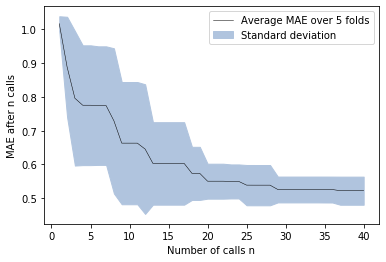

In [42]:
def plot_convergence(dataframe, n_calls):

    # x values
    x = list(range(1, n_calls + 1))
    
    # y values
    cumltv_MAE = [dataframe.loc[dataframe['Fold'] == fold, 'MAE/MAD'].tolist()
                   for fold in range(1, 6)]
    cumltv_MAE = list(zip(*cumltv_MAE))   
    y = [statistics.mean(call) for call in cumltv_MAE]
    
    # standard devation
    stdev = [statistics.stdev(call) for call in cumltv_MAE]
    
    # standard devation bounds
    y1 = [i - sd for i, sd in zip(y, stdev)]
    y2 = [i + sd for i, sd in zip(y, stdev)]
    
    # plot mean line
    line = plt.plot(x, 
             y, 
             color='black', 
             linewidth=0.5, 
                    label='Average MAE over 5 folds')
    
    # plot standard deviation bounds
    fill = plt.fill_between(x, 
                     y1, 
                     y2, 
                     fc='lightsteelblue', 
                            ec='lightsteelblue', 
                            label='Standard deviation')
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')

    plt.legend()


plot_convergence(cumulative_MAE_df, 40)

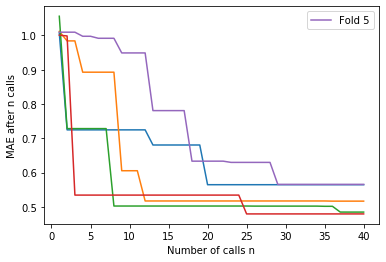

In [43]:
def plot_individual_convergence(dataframe, fold, n_calls):

    x = list(range(1, n_calls + 1))
    y = dataframe.loc[dataframe['Fold'] == fold]
    y = y['MAE/MAD'].tolist()

    line = plt.plot(x, y, label='Fold {}'.format(fold))
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')
    
    plt.legend(handles=line)


num_folds = range(1, 6)  # 5 folds
for fold in num_folds:
    plot_individual_convergence(cumulative_MAE_df, fold, 40)

## External testing

### Per SVR model

In [44]:
def svr_predict(model_num, test_set):

    with open(output_dr + '/fold_' + str(model_num) + '_SVM_model.svm', 'rb') as file:
        model = pickle.load(file)
    
    return model.predict(test_set)


def calc_mae(dataframe, model):

    model_df = dataframe.loc[dataframe['Model number'] == model]
    abs_err = model_df['Absolute error (kcal/mol)'].tolist()
    MAE = statistics.mean(abs_err)
    
    return MAE


# load in testing set
# note: test_df defined previously in section 5.3
test_ID = test_df.index
test_X = test_df.drop(columns='dGoffset (kcal/mol)').values
test_y = test_df['dGoffset (kcal/mol)'].values

# empty df for external testing results
test_rst = pd.DataFrame()

# peform prediction using each model
num_models = num_folds

for model in num_models:
    
    # call SVR prediction function
    svr_rst = svr_predict(model, test_X)
    
    # write results per fold into dictionary and load into df
    model_rst = {}
    model_rst['ID'] = test_ID
    model_rst['Model number'] = [model for i in range(41)]
    model_rst['Experimental dGoffset (kcal/mol)'] = test_y
    model_rst['Predcted dGoffset (kcal/mol)'] = svr_rst
    model_rst['Absolute error (kcal/mol)'] = abs(test_y - svr_rst)

    test_rst = pd.concat([test_rst, pd.DataFrame(model_rst)])


# calculate MAE values
MAE_lst = [calc_mae(test_rst, model) for model in num_models]
print('MAE values between experimental and predicted dGoffset values:\n')
for model, model_MAE in enumerate(MAE_lst):
    print('Model {} MAE: {} kcal/mol'.format(model + 1, round(model_MAE, 2)))
print('\nAverage MAE: {} kcal/mol'.format(round(statistics.mean(MAE_lst), 2)))


test_rst = test_rst.round(2)
test_rst

MAE values between experimental and predicted dGoffset values:

Model 1 MAE: 0.78 kcal/mol
Model 2 MAE: 0.88 kcal/mol
Model 3 MAE: 0.8 kcal/mol
Model 4 MAE: 0.91 kcal/mol
Model 5 MAE: 0.76 kcal/mol

Average MAE: 0.83 kcal/mol


,ID,Model number,Experimental dGoffset (kcal/mol),Predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_2316618,1,-0.61,1.31,1.92
1,mobley_5282042,1,-0.08,0.88,0.96
2,mobley_6688723,1,-0.46,-0.14,0.32
3,mobley_2972345,1,0.52,0.81,0.29
4,mobley_4479135,1,-0.31,0.36,0.67
...,...,...,...,...,...
36,mobley_819018,5,-1.93,-1.82,0.11
37,mobley_2613240,5,-1.28,0.08,1.36
38,mobley_6935906,5,0.47,0.84,0.37
39,mobley_1160109,5,-0.41,-0.02,0.39


### Averaged over all models

In [45]:
# average predicted offset values
prdt_offsets = [test_rst.loc[test_rst['Model number'] == model, 'Predcted dGoffset (kcal/mol)'].tolist()
                   for model in num_models]
prdt_offsets = list(zip(*prdt_offsets))
avg_offsets = [statistics.mean(offset_set) for offset_set in prdt_offsets]

# write results to df
avg_rst = {}

avg_rst['ID'] = test_ID
avg_rst['Experimental dGoffset (kcal/mol)'] = test_y
avg_rst['Averaged predcted dGoffset (kcal/mol)'] = avg_offsets
avg_rst['Absolute error (kcal/mol)'] = abs(test_y - avg_offsets)

avg_rst_df = pd.DataFrame(avg_rst)

# MAE
print('MAE between experimental and averaged predicted dGoffsets:')
test_offset_MAE = round(statistics.mean(abs(test_y - avg_offsets)), 2)
print('MAE: {} kcal/mol'.format(test_offset_MAE))

avg_rst_df = avg_rst_df.round(2)
avg_rst_df

MAE between experimental and averaged predicted dGoffsets:
MAE: 0.8 kcal/mol


,ID,Experimental dGoffset (kcal/mol),Averaged predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_2316618,-0.61,1.40,2.01
1,mobley_5282042,-0.08,1.05,1.13
2,mobley_6688723,-0.46,-0.40,0.06
3,mobley_2972345,0.52,0.90,0.38
4,mobley_4479135,-0.31,0.13,0.44
5,mobley_6195751,1.17,0.06,1.11
6,mobley_2850833,4.13,0.07,4.06
7,mobley_8052240,2.77,0.75,2.02
8,mobley_5917842,-1.25,-0.78,0.47
9,mobley_9897248,-2.18,-1.51,0.67


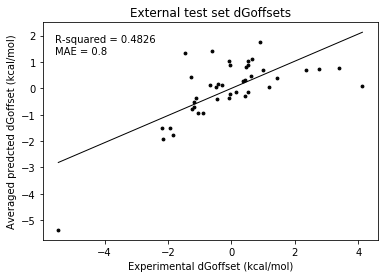

In [46]:
plot_scatter(avg_rst_df, 
        [1, 'Experimental dGoffset (kcal/mol)'], 
        [2, 'Averaged predcted dGoffset (kcal/mol)'], 
             title='External test set dGoffsets', 
             MAE=test_offset_MAE)

## Corrected hydration free energies

In [47]:
# SAMPL4 Gurthrie df
test_fs_df = freesolv_df.loc[freesolv_df.iloc[:, 7] == 'SAMPL4_Guthrie']

# experimental dGhydr
test_exp = test_fs_df.iloc[:, 3]

# calculated dGhydr
test_calc = test_fs_df.iloc[:, 5].tolist()

# calculated dGhydr uncertainty
test_calc_err = test_fs_df.iloc[:, 6].tolist()

# corrected calculated Ghydr using predicted dGoffsets
corr_calc = [calc + err for calc, err in zip(test_calc, avg_offsets)]

# calculated dGhydr absolute error
calc_AE = [abs(exp - calc) for exp, calc in zip(test_exp, test_calc)]

# corrected calculated dGhydr propogated absolute error
# corr_AE = (err1**2 + err2**2)**0.5
corr_AE = [abs(exp - calc) for exp, calc in zip(test_exp, corr_calc)]

# create df
corr_dict = {'ID': test_ID, 
             'Experimental dGhydr (kcal/mol)': test_exp, 
             'Calculated dGhydr (kcal/mol)': test_calc, 
             'Calculated dGhydr absolute error (kcal/mol)': calc_AE,  
             'Corrected calculated dGhydr (kcal/mol)': corr_calc, 
             'Corrected calculated dGhydr absolute error (kcal/mol)': corr_AE}

corr_df = pd.DataFrame(corr_dict).round(2)

# calculate MAEs
calc_MAE = statistics.mean(calc_AE)
print('Mobley calculated MAE: {} kcal/mol'.format(round(calc_MAE, 2)))
corr_MAE = statistics.mean(corr_AE)
print('Corrected calculated MAE: {} kcal/mol'.format(round(corr_MAE, 2)))

corr_df

Mobley calculated MAE: 1.17 kcal/mol
Corrected calculated MAE: 1.67 kcal/mol


,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
10,mobley_2316618,-3.75,-3.34,0.41,-1.94,1.81
79,mobley_5282042,-9.34,-7.87,1.47,-6.82,2.52
98,mobley_6688723,-5.66,-4.77,0.89,-5.17,0.49
113,mobley_2972345,-14.21,-13.60,0.61,-12.70,1.51
123,mobley_4479135,-11.85,-15.25,3.40,-15.12,3.27
140,mobley_6195751,-5.33,-4.05,1.28,-3.99,1.34
141,mobley_2850833,-4.80,-5.32,0.52,-5.25,0.45
162,mobley_8052240,-4.68,-8.81,4.13,-8.06,3.38
173,mobley_5917842,-3.78,-4.30,0.52,-5.08,1.30
180,mobley_9897248,-0.85,-0.76,0.09,-2.27,1.42


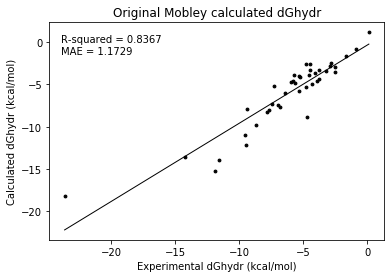

In [48]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [2, 'Calculated dGhydr (kcal/mol)'], 
             title='Original Mobley calculated dGhydr', 
             MAE=calc_MAE)

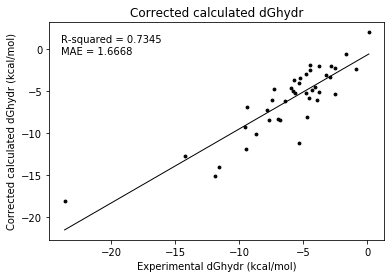

In [49]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [4, 'Corrected calculated dGhydr (kcal/mol)'], 
             title='Corrected calculated dGhydr', 
             MAE=corr_MAE)

### Best and worst corrected ligands

In [70]:
corr_AE_sort_df = corr_df.sort_values(by='Corrected calculated dGhydr absolute error (kcal/mol)')
corr_AE_sort_df

,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
541,mobley_7417968,-3.20,-3.35,0.15,-3.05,0.15
269,mobley_4936555,-9.53,-10.98,1.45,-9.24,0.29
447,mobley_242480,-2.49,-2.96,0.47,-2.19,0.30
430,mobley_3265457,-6.44,-5.98,0.46,-6.13,0.31
314,mobley_2126135,-4.09,-3.59,0.50,-4.52,0.43
141,mobley_2850833,-4.80,-5.32,0.52,-5.25,0.45
389,mobley_3515580,-2.87,-2.81,0.06,-3.34,0.47
631,mobley_1160109,-4.29,-4.94,0.65,-4.78,0.49
98,mobley_6688723,-5.66,-4.77,0.89,-5.17,0.49
199,mobley_9741965,-7.78,-8.29,0.51,-7.18,0.60


In [72]:
# hand picked IDs
# []
picked_IDs = ['mobley_7417968', 'mobley_4936555','mobley_5006685', 'mobley_4587267']

# retrieve rows
three_results = corr_AE_sort_df[corr_AE_sort_df['ID'].isin(picked_IDs)]
three_results

,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
541,mobley_7417968,-3.20,-3.35,0.15,-3.05,0.15
269,mobley_4936555,-9.53,-10.98,1.45,-9.24,0.29
282,mobley_5006685,-23.62,-18.16,5.46,-18.10,5.52
482,mobley_4587267,-5.31,-5.75,0.44,-11.11,5.80


In [73]:
worse_best_save_loc =  absolute_dGoffset_path + 'worst_best_ligands.csv'

if os.path.exists(worse_best_save_loc):
    os.remove(worse_best_save_loc)
    three_results.to_csv(path_or_buf=worse_best_save_loc, index=False)
    print('Existing file overwritten.')
else:
    three_results.to_csv(path_or_buf=worse_best_save_loc, index=False)

## Determining high absolute errors

In [50]:
def draw_structure_panel(sdf_suppl, legend):
    'Draw RDKit.Draw in panel format.'

    suppl = [SDMolSupplier(sdf) for sdf in sdf_suppl]
    mols = [x[0] for x in suppl if x is not None]
    for mol in mols:
        tmp = AllChem.Compute2DCoords(mol)
    
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=legend)    

$$ \Delta{G_{offset}} = \Delta{G_{exp}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{offset}} = \Delta{G_{corrected}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{corrected}} = \Delta{G_{calc}} + \Delta{G_{offset}} $$

### Tanimoto Coefficient

$$ T_{a,b}=\frac{M_{a,b}}{M_{a}+M_{b}+M_{a,b}} $$
$$ M_{a}=single test set ligand 1D feature list $$
$$ M_{b}=validation set feature list $$
$$ M_{a,b}= $$

In [51]:
def fingerprint_similarity(fold):
    
    # retrieve IDs
    train_IDs = fold[0][0].index.tolist()
    validate_IDs = fold[0][1].index.tolist()
    test_IDs = test_ID.tolist()

    # retrieve SDFs
    train_suppl = [Chem.SDMolSupplier(train_dr + sdf + '.sdf') 
                   for sdf in train_IDs]

    valdtn_suppl = [Chem.SDMolSupplier(train_dr + sdf + '.sdf') 
               for sdf in validate_IDs]

    test_suppl = [Chem.SDMolSupplier(test_dr + sdf + '.sdf') 
           for sdf in test_IDs]
    
    # generate fingerprints
    train_fp = [Chem.RDKFingerprint(mol) for mol in train_suppl]
    valdtn_fp = [Chem.RDKFingerprint(mol) for mol in valdtn_suppl]
    test_fp = [Chem.RDKFingerprint(mol) for mol in test_suppl]
    
    # compare fingerprints
    test_train_similarity = [DataStructs.FingerprintSimilarity(test_mol, train_mol)
                            for test_mol in test_fp
                            for train_mol in train_fp]
    
    test_valdtn_similarity = [DataStructs.FingerprintSimilarity(test_mol, valdtn_mol)
                        for test_mol in test_fp
                        for valdtn_mol in valdtn_fp]
    
    return test_train_similarity, test_valdtn_similarity


lst1, lst2 = fingerprint_similarity(kfolds[0])

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(SDMolSupplier)
did not match C++ signature:
    RDKFingerprint(RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, boost::python::api::object atomInvariants=0, boost::python::api::object fromAtoms=0, boost::python::api::object atomBits=None, boost::python::api::object bitInfo=None)

In [ ]:
def tanimoto(list1, list2):
  intersection = [common_item for common_item in list1 if common_item in list2]
  return float(len(c))/(len(a) + len(b) - len(c))

In [ ]:
# list of test SDF paths from section 5.3.2
new_test_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf
               for sdf in test_sdf]

corr_AE = corr_df.iloc[:, 5].tolist()
corr_AE = [str(x) for x in corr_AE]

# draw_structure_panel(new_test_sdf, corr_AE)

### Absolute error < 1.00

In [ ]:
# df containing entries with corrected calculated dGhydr absolute errors < 1.00
below_one_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 1.00]

# sdf paths
below_one_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in below_one_df['ID']]

# Actual absolute error values
below_one_AE = [str(x) for x in below_one_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(below_one_df), 'structures have dGhydr absolute erros < 1.00 kcal/mol')
draw_structure_panel(below_one_sdf, below_one_AE)

### 1.00 < absolute error < 2.00

In [ ]:
# df containing entries with corrected calculated dGhydr 1.00 < absolute errors < 2.00
between_1and2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 2.00]
between_1and2_df = between_1and2_df.loc[between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 1.00]

# sdf paths
between_1and2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in between_1and2_df['ID']]

# Actual absolute error values
between_1and2_AE = [str(x) for x in between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(between_1and2_df), 'structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol')
draw_structure_panel(between_1and2_sdf, between_1and2_AE)

### Absolute error > 2.00

In [ ]:
# df containing entries with corrected calculated dGhydr absolute errors > 2.00
above_2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 2.00]

# sdf paths
above_2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in above_2_df['ID']]

# Actual absolute error values
above_2_AE = [str(x) for x in above_2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(above_2_df), 'structures have dGhydr absolute erros > 2.00 kcal/mol')
draw_structure_panel(above_2_sdf, above_2_AE)